In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.loss_history = []

    def forward(self, X):
        self.hidden_linear = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = sigmoid(self.hidden_linear)
        self.output_linear = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.output_final = sigmoid(self.output_linear)
        return self.output_final

    def backward(self, X, y, output, learning_rate):
        error = y - output
        d_output = error * sigmoid_derivative(output)

        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * sigmoid_derivative(self.hidden_activation)

        self.weights_hidden_output += self.hidden_activation.T.dot(d_output) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden) * learning_rate
        self.bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            loss = np.mean(np.square(y - output))
            self.loss_history.append(loss)

# DATA
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1) / 10.0
y = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

# TRAIN
nn = SimpleMLP(input_size=1, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

print("Final Predictions:")
print(nn.forward(X))


Final Predictions:
[[2.94711175e-06]
 [5.79815303e-06]
 [1.80023584e-05]
 [1.19490531e-04]
 [2.30200593e-03]
 [1.08489744e-01]
 [8.89722754e-01]
 [9.95978830e-01]
 [9.99583143e-01]
 [9.99889819e-01]]


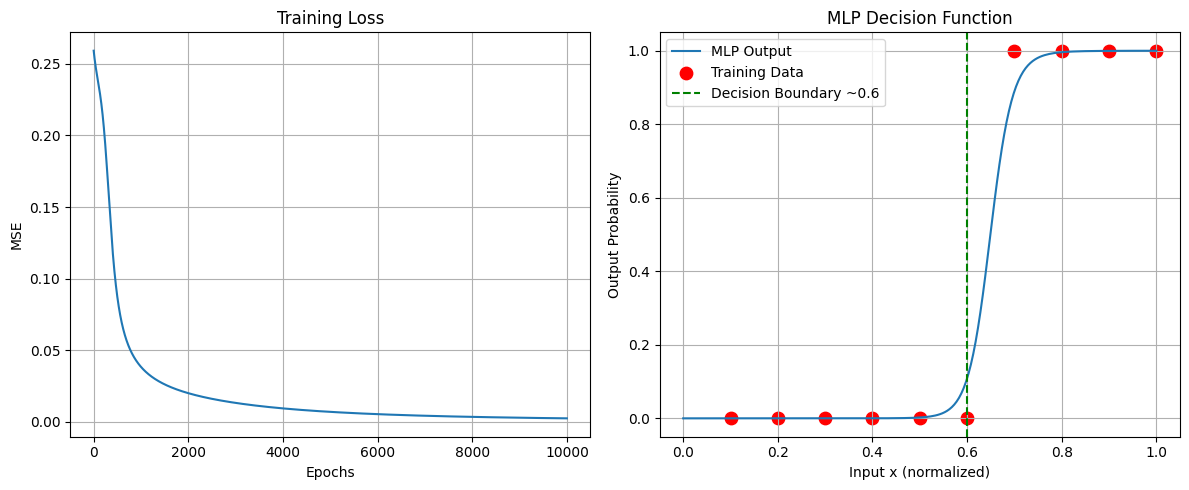

In [5]:
plt.figure(figsize=(12,5))

# ---- Loss Curve ----
plt.subplot(1,2,1)
plt.plot(nn.loss_history)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)

# ---- Decision Boundary (1D case) ----
plt.subplot(1,2,2)

x_test = np.linspace(0,1,200).reshape(-1,1)
y_pred = nn.forward(x_test)

plt.plot(x_test, y_pred, label="MLP Output")
plt.scatter(X, y, color='red', s=80, label="Training Data")
plt.axvline(x=0.6, color='green', linestyle='--', label="Decision Boundary ~0.6")
plt.title("MLP Decision Function")
plt.xlabel("Input x (normalized)")
plt.ylabel("Output Probability")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
